In [13]:
from importlib import reload
from dfprepare import norm_data

import BRR
reload(BRR)
from BRR import *

,y,x1,x2,x3,x4,x5
0,0,14,4.30,1.00,2,3.72
1,0,12,11.54,8.49,3,40.28
2,0,14,5.84,2.47,3,56.00
3,1,11,14.70,6.60,1,57.41
4,0,21,5.10,3.48,1,83.00
5,0,12,6.14,3.09,1,62.57
6,1,17,5.05,1.14,3,22.16
7,1,12,11.30,8.85,1,12.00
8,0,14,3.30,1.20,3,110.00
9,1,19,6.60,4.30,1,2.96


,y,x1,x2,x3,x4,x5
0,0,0.1875,0.063694,0.000000,2,0.007318
1,0,0.0625,0.524841,0.499333,3,0.098947
2,0,0.1875,0.161783,0.098000,3,0.138346
3,1,0.0000,0.726115,0.373333,1,0.141880
4,0,0.6250,0.114650,0.165333,1,0.206015
5,0,0.0625,0.180892,0.139333,1,0.154812
6,1,0.3750,0.111465,0.009333,3,0.053534
7,1,0.0625,0.509554,0.523333,1,0.028070
8,0,0.1875,0.000000,0.013333,3,0.273684
9,1,0.5000,0.210191,0.220000,1,0.005414


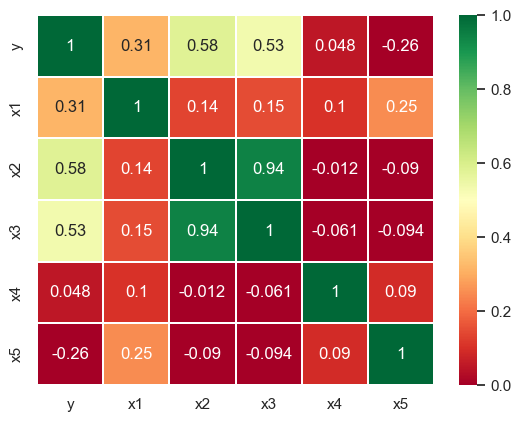

In [14]:
# Read dataframe
data = pd.read_excel('doctor.xlsx')
data.dropna(inplace=True)
display(data)

# Dependent variable
explore_column = 'y' 

# Categorical variables 
categorical_columns = ['x4']
 
# Normalization
data = norm_data(data, pass_columns=categorical_columns)
display(data)

# Correlation
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.1, vmin=0)

for cc in categorical_columns:
    data[cc] = data[cc].astype('category')

### Строим базовую _logit_ модель

                                      y                                       
Dep. Variable:                      y   No. Observations:                   58
Model:                            GLM   Df Residuals:                       51
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19.625
Date:                Fri, 01 Dec 2023   Deviance:                       39.251
Time:                        17:01:38   Pearson chi2:                     48.4
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4687
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3512      1.481     -2.263      0.0

,Variable,VIF,Tolerance
0,x1,3.877976,0.257866
1,x2,37.852073,0.026419
2,x3,34.116835,0.029311
3,x4,4.198339,0.238189
4,x5,1.803009,0.554628


,dfb_Intercept,dfb_C(x4)[T.2],dfb_C(x4)[T.3],dfb_x1,dfb_x2,dfb_x3,dfb_x5,cooks_d,standard_resid,hat_diag,dffits_internal
0,-0.086747,-0.297267,0.002792,0.069148,0.035110,-0.015525,0.022950,1.366896e-02,-0.275046,0.558461,-0.309331
1,-0.045414,-0.059042,-0.169265,0.283783,0.065251,-0.109563,-0.118092,2.967838e-02,-1.040280,0.161054,-0.455797
2,-0.035568,-0.008248,-0.028363,0.055761,0.011826,0.009714,-0.056835,1.563187e-03,-0.365467,0.075721,-0.104606
3,-0.102185,-0.057805,-0.191446,0.013175,0.544704,-0.526901,0.102604,5.806688e-02,0.569216,0.556444,0.637555
4,-0.028290,0.067354,0.213153,-0.086985,0.126014,-0.082064,-0.246434,3.288568e-02,-0.726025,0.303969,-0.479795
5,-0.025880,-0.001615,0.019708,0.030347,0.011494,-0.004590,-0.025930,2.573050e-04,-0.182978,0.051050,-0.042440
6,0.091827,-0.052157,0.142797,0.224853,0.238830,-0.328069,-0.250920,4.411101e-02,0.991939,0.238858,0.555681
7,0.340012,-0.003967,-0.287416,-0.213308,-0.133556,0.181948,-0.173142,4.512211e-02,0.989480,0.243917,0.562013
8,-0.001758,-0.000816,-0.000871,0.004996,0.003548,-0.002259,-0.006891,9.462534e-06,-0.063944,0.015941,-0.008139
9,0.076470,-0.044210,-0.098460,0.138899,0.018503,-0.022659,-0.175886,8.197241e-03,0.477642,0.200967,0.239545


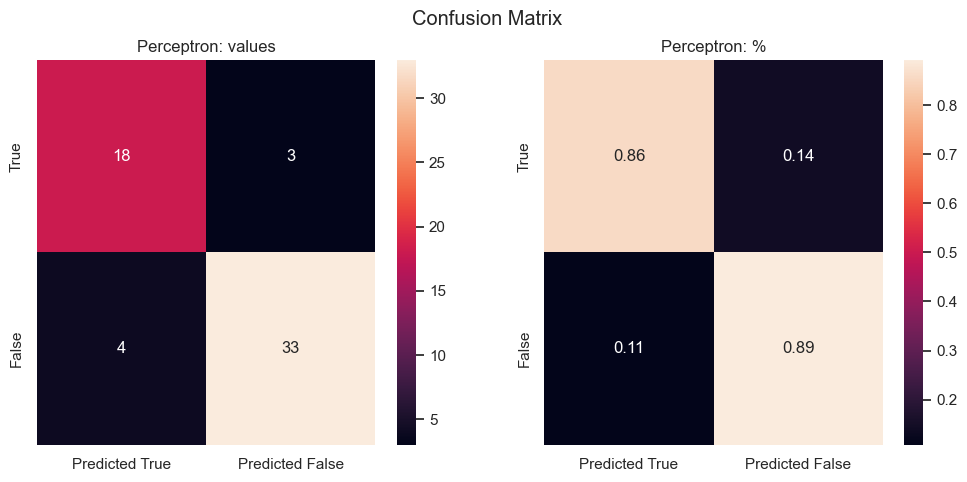

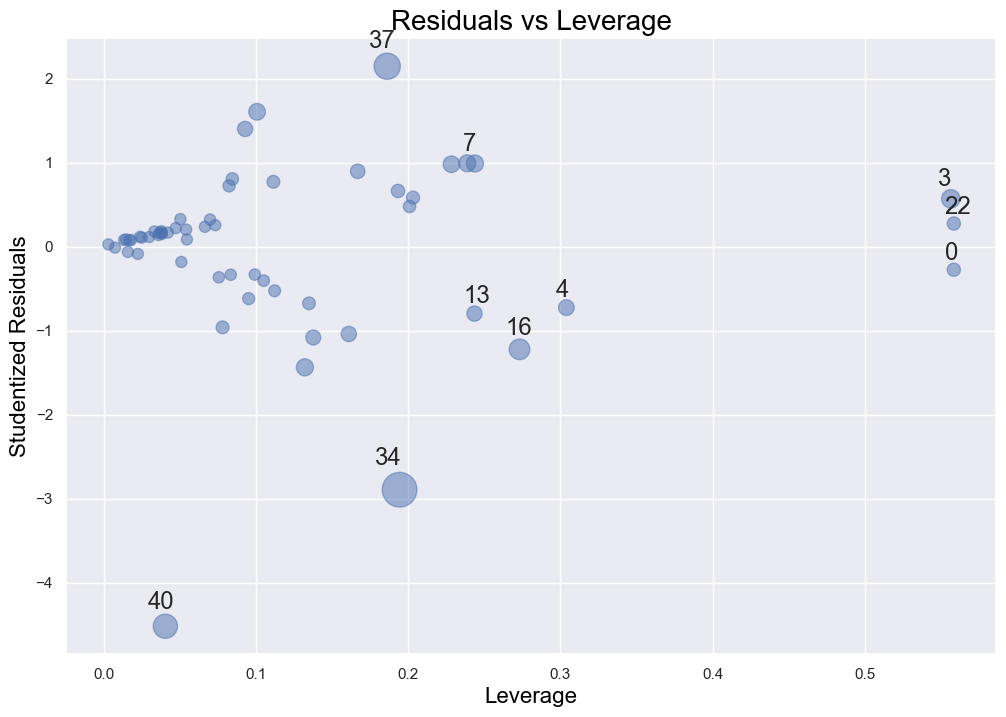

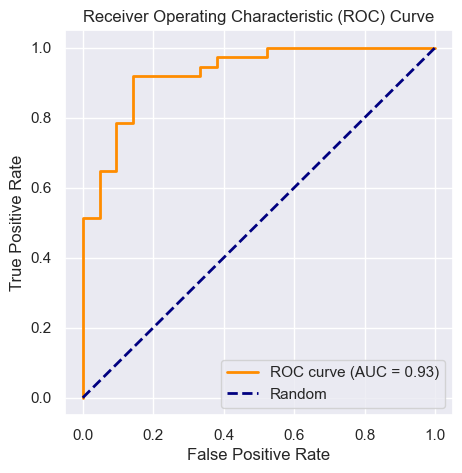

                                STEPS AIC                              
Selected Features: ['x1', 'x2', 'x3', 'x4', 'x5'] 
AIC: 53.25078387094586 
Selected Features: ['x1', 'x2', 'x3', 'x5'] 
AIC: 49.73678858988547 
Selected Features: ['x1', 'x2', 'x5'] 
AIC: 48.61803659119581 


In [15]:
logit_research = BinomialRegressionResearch(data, column=explore_column, family=logit)
logit_research.info()
logit_research.draw_plots()
logit_new_model, logit_selected_features = logit_research.stepwise_selection(criteria='AIC')

### Строим базовую _probit_ модель

                                      y                                       
Dep. Variable:                      y   No. Observations:                   58
Model:                            GLM   Df Residuals:                       51
Model Family:                Binomial   Df Model:                            6
Link Function:                 Probit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19.620
Date:                Fri, 01 Dec 2023   Deviance:                       39.239
Time:                        17:01:39   Pearson chi2:                     45.9
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4688
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9052      0.808     -2.359      0.0

,Variable,VIF,Tolerance
0,x1,3.877976,0.257866
1,x2,37.852073,0.026419
2,x3,34.116835,0.029311
3,x4,4.198339,0.238189
4,x5,1.803009,0.554628


,dfb_Intercept,dfb_C(x4)[T.2],dfb_C(x4)[T.3],dfb_x1,dfb_x2,dfb_x3,dfb_x5,cooks_d,standard_resid,hat_diag,dffits_internal
0,-0.090620,-2.960072e-01,0.008097,0.071998,3.523440e-02,-1.875934e-02,0.028926,1.215955e-02,-0.253937,0.568960,-0.311521
1,-0.047868,-7.098311e-02,-0.161787,0.282704,6.673707e-02,-9.847652e-02,-0.116049,2.155522e-02,-0.978045,0.136246,-0.396870
2,-0.029036,-8.658463e-03,-0.038684,0.053283,6.225227e-03,1.377620e-02,-0.058756,1.703990e-03,-0.374386,0.078425,-0.112017
3,-0.093209,-6.369894e-02,-0.183420,-0.005155,5.989696e-01,-5.759444e-01,0.104114,6.071061e-02,0.579510,0.558585,0.692275
4,-0.027127,7.752280e-02,0.155896,-0.124184,1.046038e-01,-5.752435e-02,-0.170631,2.435824e-02,-0.734037,0.240383,-0.404984
5,-0.025819,-1.373363e-03,0.017064,0.029037,9.232444e-03,-3.101744e-03,-0.021513,2.424866e-04,-0.166067,0.057980,-0.041143
6,0.088660,-6.653900e-02,0.087365,0.207076,2.093602e-01,-2.868554e-01,-0.179625,3.166179e-02,0.972652,0.189805,0.469999
7,0.376834,1.045418e-03,-0.284307,-0.233059,-1.483724e-01,1.812841e-01,-0.194681,3.962809e-02,1.018352,0.211038,0.544230
8,-0.000363,-3.523194e-04,-0.000745,0.001716,1.211708e-03,-7.865912e-04,-0.002482,1.279885e-06,-0.028999,0.010541,-0.003016
9,0.111352,-5.949975e-02,-0.129649,0.148211,6.292228e-03,-1.920369e-02,-0.187640,9.310847e-03,0.501543,0.205783,0.267259


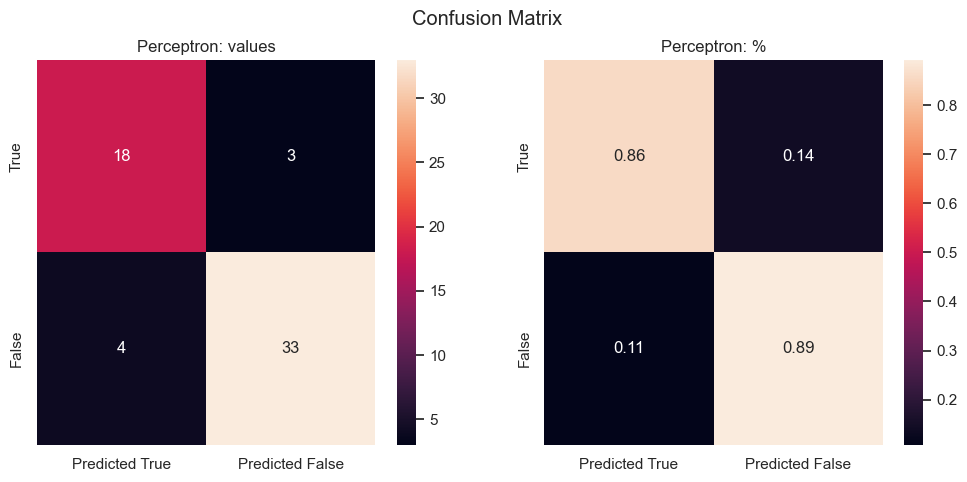

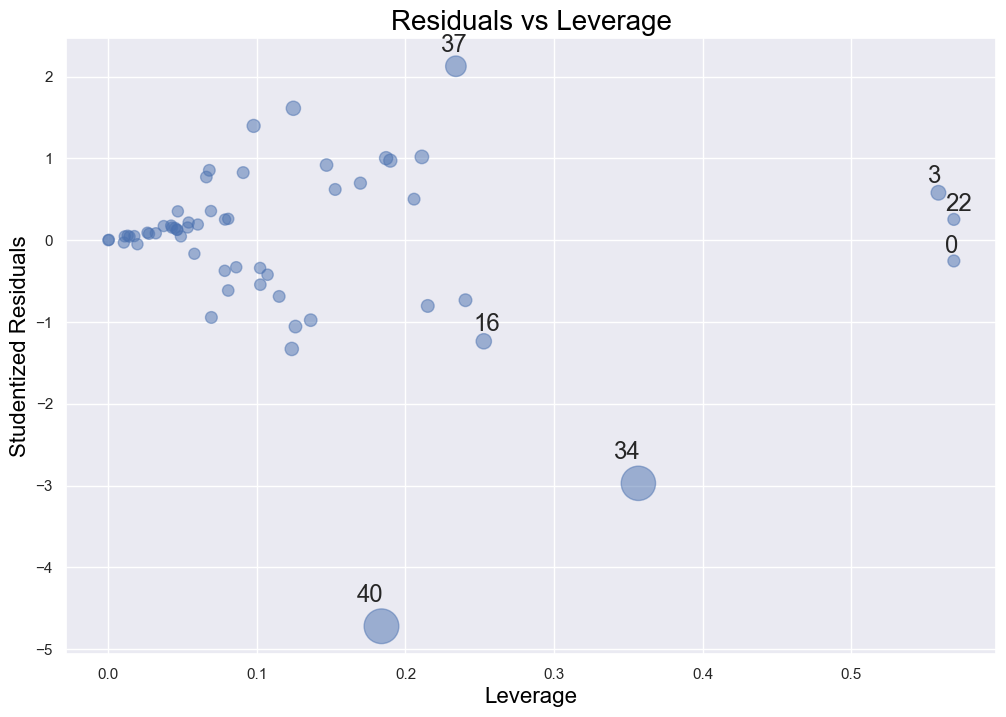

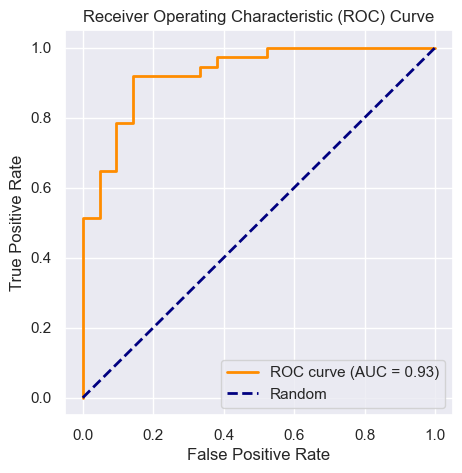

                                STEPS AIC                              
Selected Features: ['x1', 'x2', 'x3', 'x4', 'x5'] 
AIC: 53.239187261420405 
Selected Features: ['x1', 'x2', 'x3', 'x5'] 
AIC: 49.755978021373764 
Selected Features: ['x1', 'x2', 'x5'] 
AIC: 48.788966999183536 


In [16]:
probit_research = BinomialRegressionResearch(data, column=explore_column, family=probit)
probit_research.info()
probit_research.draw_plots()
probit_new_model, probit_selected_features = probit_research.stepwise_selection(criteria='AIC')

### Проведём исследование улучшенной модели

                                      y                                       
Dep. Variable:                      y   No. Observations:                   58
Model:                            GLM   Df Residuals:                       54
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20.309
Date:                Fri, 01 Dec 2023   Deviance:                       40.618
Time:                        17:01:40   Pearson chi2:                     54.2
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4560
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.0994      1.282     -2.417      0.0

,Variable,VIF,Tolerance
0,x1,3.225721,0.310008
1,x2,2.590665,0.386001
2,x5,1.717720,0.582167


,dfb_Intercept,dfb_x1,dfb_x2,dfb_x5,cooks_d,standard_resid,hat_diag,dffits_internal
0,-0.187829,0.053390,0.127012,0.101279,0.010145,-0.507930,0.135912,-0.201444
1,-0.102602,0.256360,-0.104827,-0.092746,0.041078,-1.097954,0.119952,-0.405354
2,-0.044631,0.049213,0.052169,-0.045355,0.001500,-0.323574,0.054216,-0.077472
3,-0.060249,-0.251635,0.234402,0.214664,0.060422,0.836362,0.256789,0.491616
4,0.115850,-0.172712,0.154307,-0.291285,0.062762,-0.843778,0.260692,-0.501049
5,-0.024972,0.036310,0.027096,-0.029696,0.000532,-0.209889,0.046097,-0.046140
6,0.308256,0.094974,-0.265682,-0.216062,0.057911,1.349612,0.112827,0.481294
7,0.124044,-0.095386,0.083457,-0.133626,0.018738,0.723752,0.125174,0.273771
8,-0.002667,0.006074,0.006485,-0.009464,0.000031,-0.078207,0.019626,-0.011065
9,0.039062,0.125452,0.001533,-0.156486,0.009678,0.478402,0.144670,0.196751


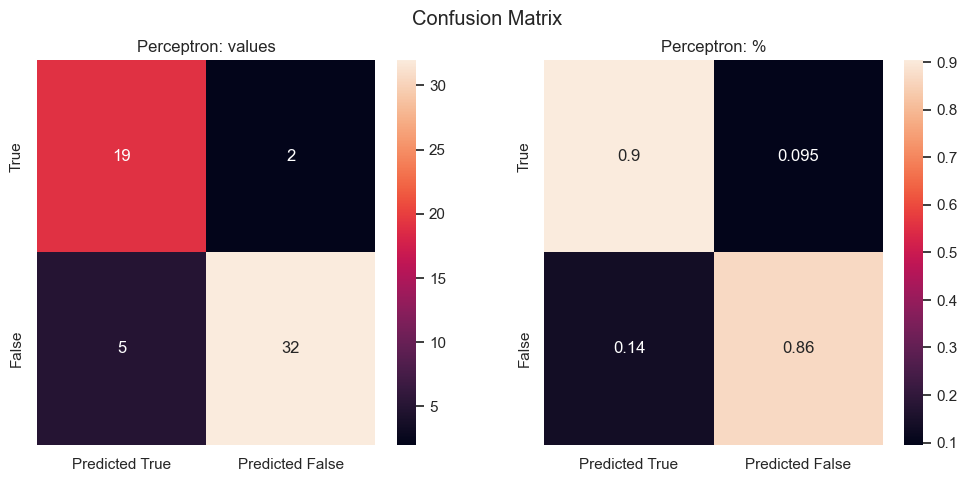

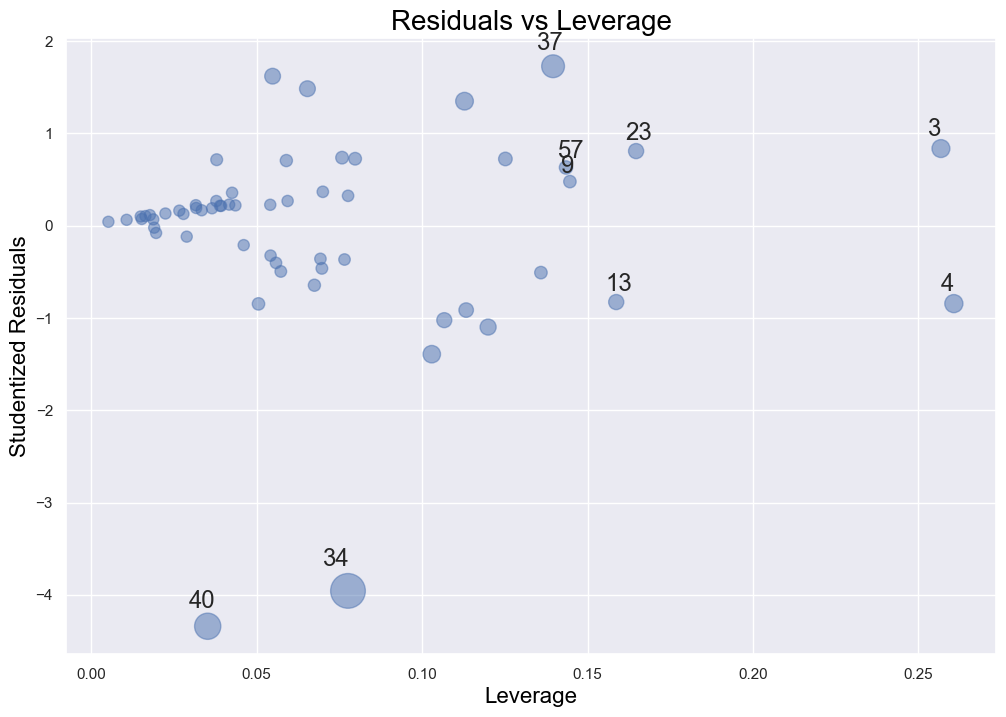

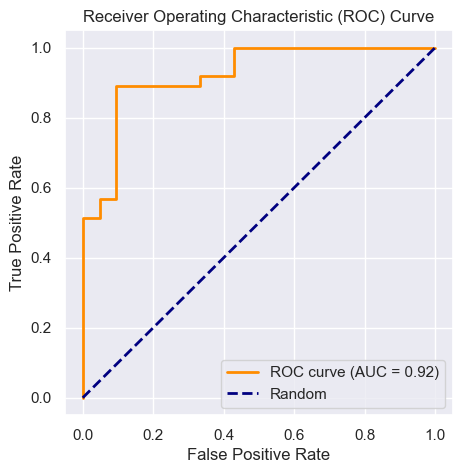

In [17]:
new_data = data[logit_selected_features + [explore_column]]
enhanced_research = BinomialRegressionResearch(new_data, column=explore_column, family=logit)
enhanced_research.info()
enhanced_research.draw_plots()

                                      y                                       
Dep. Variable:                      y   No. Observations:                   58
Model:                            GLM   Df Residuals:                       54
Model Family:                Binomial   Df Model:                            3
Link Function:                 Probit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20.394
Date:                Fri, 01 Dec 2023   Deviance:                       40.789
Time:                        17:01:41   Pearson chi2:                     50.4
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4544
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.7236      0.695     -2.479      0.0

,Variable,VIF,Tolerance
0,x1,3.225721,0.310008
1,x2,2.590665,0.386001
2,x5,1.717720,0.582167


,dfb_Intercept,dfb_x1,dfb_x2,dfb_x5,cooks_d,standard_resid,hat_diag,dffits_internal
0,-0.185365,0.042000,0.120715,0.101887,9.993506e-03,-0.542203,0.119698,-0.199080
1,-0.124162,0.268646,-0.077245,-0.077960,3.061592e-02,-1.030075,0.103474,-0.357406
2,-0.044595,0.046976,0.050522,-0.043915,1.532831e-03,-0.322514,0.055665,-0.079924
3,-0.004943,-0.323085,0.206515,0.205863,5.638684e-02,0.912790,0.213035,0.475863
4,0.086357,-0.178056,0.173122,-0.233039,4.598466e-02,-0.816459,0.216260,-0.431581
5,-0.023615,0.035023,0.023544,-0.027768,4.953055e-04,-0.188847,0.052630,-0.045620
6,0.297505,0.127061,-0.278913,-0.199266,5.523867e-02,1.308932,0.114232,0.479847
7,0.144045,-0.127070,0.068125,-0.118242,1.690626e-02,0.761891,0.104343,0.264602
8,-0.000970,0.002386,0.002612,-0.003984,5.551197e-06,-0.039067,0.014340,-0.004741
9,0.049439,0.125603,-0.022201,-0.144532,9.038738e-03,0.488729,0.131467,0.194516


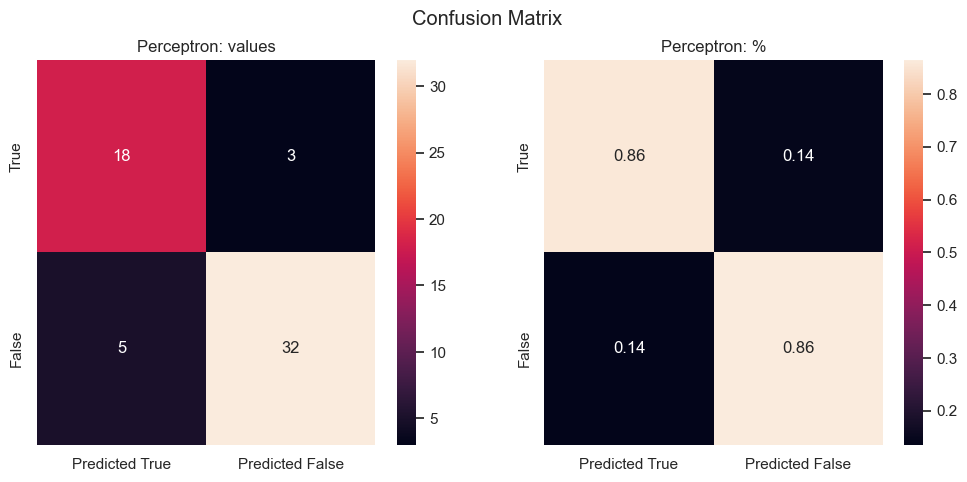

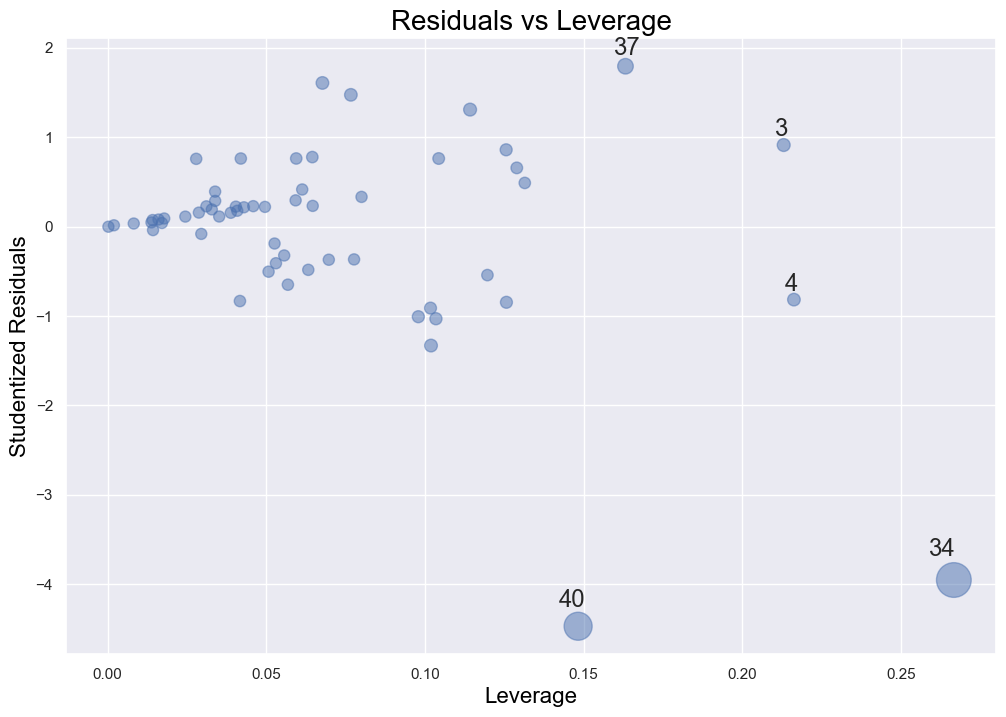

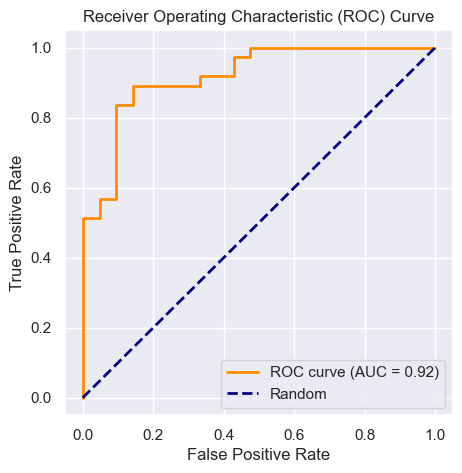

In [18]:
new_data = data[probit_selected_features + [explore_column]]
enhanced_research = BinomialRegressionResearch(new_data, column=explore_column, family=probit)
enhanced_research.info()
enhanced_research.draw_plots()